# [spooky-author-identification](https://www.kaggle.com/c/spooky-author-identification/)

In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
import numpy as np
import pandas as pd
from utils.data.kaggle.spooky_dataset import *
from utils.dataset import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Dhira Dataset Handler backed by Pandas

In [8]:
DATA_STORE_PATH="spooky_author_identification_data/"
TEXT_COL = "text"
CATEOGORY_COL = "author"

TRAIN_FILE_PATH = "../data/spooky_author_identification/input/train.csv"
TEST_FILE_PATH = "../data/spooky_author_identification/input/test.csv"


#Prepare the dataset
dataset: TextDataFrame = TextDataFrame(train_file_path=TRAIN_FILE_PATH,
                                       test_file_path=TEST_FILE_PATH,
                                       text_col=TEXT_COL,
                                       category_cols = None,
                                       category_col = CATEOGORY_COL,
                                       dataset_name=DATA_STORE_PATH,
                                       max_doc_legth = 100, 
                                       max_word_length = 10,
                                       is_multi_label=False,
                                      tokenize=False)

100%|██████████| 3/3 [00:00<00:00, 23388.31it/s]

Fitting LabelEncoder and LabelBinarizer...
Done label encoding !
Splitting the train set into trai and vaidation (stratified sampling)...
Done splitting!


Preparing vocab file...
No <UNK> token found
spooky_author_identification_data//words_vocab.tsv


In [3]:
# To get the raw text features:
train_text_data = dataset.get_train_text_data()
val_text_data = dataset.get_val_text_data()
test_tezt_data = dataset.get_test_text_data()

#To get text word ids
train_text_word_ids = dataset.get_train_text_word_ids()
val_text_word_ids = dataset.get_val_text_word_ids()
test_text_word_ids = dataset.get_test_text_word_ids()

#To get text word char IDS
train_text_word_char_ids = dataset.get_train_text_word_char_ids()
val_text_word_char_ids = dataset.get_val_text_word_char_ids()
test_text_word_char_ids = dataset.get_test_text_word_char_ids()

# To get indexed category labels:
train_label = dataset.get_train_label()
val_label = dataset.get_val_label()
# test_label = dataset.get_test_label()

#To get on-hot encoded labels:
train_one_hot_encoded_label = dataset.get_train_one_hot_label()
val_one_hot_encoded_label= dataset.get_val_one_hot_label()
# dataset.get_one_hot_test_label()

Size of train utils: 2.332MB
Size of validation utils: 0.587MB
Size of test utils: 1.240MB


100%|██████████| 8392/8392 [00:00<00:00, 14263.24it/s]

Labels and their document counts based on author
EAP    6320
HPL    4508
MWS    4835
Name: author, dtype: int64
Labels and their document counts based on author
EAP    1580
HPL    1127
MWS    1209
Name: author, dtype: int64
Labels and their document counts based on author
EAP    6320
HPL    4508
MWS    4835
Name: author, dtype: int64
Labels and their document counts based on author
EAP    1580
HPL    1127
MWS    1209
Name: author, dtype: int64


In [4]:
train_text_word_ids.shape

(15663, 100)

In [5]:
train_text_word_char_ids.shape

(15663, 100, 15)

In [6]:
dataset.word2id["<UNK>"]

1

### Get Train Data

In [12]:
train_df = dataset.get_train_data()
train_df.count(), train_df.head()

(id        19579
 text      19579
 author    19579
 dtype: int64,
         id                                               text author
 0  id26305  This process, however, afforded me no means of...    EAP
 1  id17569  It never once occurred to me that the fumbling...    HPL
 2  id11008  In his left hand was a gold snuff box, from wh...    EAP
 3  id27763  How lovely is spring As we looked from Windsor...    MWS
 4  id12958  Finding nothing else, not even gold, the Super...    HPL)

### Get Test Data

In [14]:
test_df = dataset.get_test_df()
test_df.count()

Unnamed: 0         8392
id                 8392
text               8392
spacy_processed    8392
dtype: int64

### Exploratory Data Analysis

In [13]:
train_df["doc_length"] = train_df["text"].apply(lambda sentence: len(sentence.split(" ")))
train_df["max_word_length"] = train_df["text"].apply(lambda sentence: 
                                                 max([len(word) \
                                                      for word  in sentence.split(" ")]))

In [14]:
train_df.head()

,id,text,author,doc_length,max_word_length
0,id26305,"This process, however, afforded me no means of...",EAP,41,12
1,id17569,It never once occurred to me that the fumbling...,HPL,14,8
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,36,13
3,id27763,How lovely is spring As we looked from Windsor...,MWS,34,9
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,27,14


In [15]:
train_df["doc_length"].describe(), train_df["max_word_length"].describe(),

(count    19579.000000
 mean        26.730477
 std         19.048353
 min          2.000000
 25%         15.000000
 50%         23.000000
 75%         34.000000
 max        861.000000
 Name: doc_length, dtype: float64, count    19579.000000
 mean        10.359262
 std          2.125577
 min          4.000000
 25%          9.000000
 50%         10.000000
 75%         12.000000
 max         56.000000
 Name: max_word_length, dtype: float64)

In [16]:
# Lets see how many documents are greater than MAX_DOC_LENGTH
MAX_DOC_LENGTH = 100
print("Number of documents tha will be missed: ", train_df[train_df["doc_length"] > MAX_DOC_LENGTH].count()[0])
print("Total number of documents: ", train_df.count()[0])

Number of documents tha will be missed:  88
Total number of documents:  19579


In [17]:
# Lets see how many documents are greater than MAX_DOC_LENGTH
MAX_WORD_LENGTH = 15
print("Number of words tha will be missed: ", train_df[train_df["max_word_length"] > MAX_WORD_LENGTH].count()[0])

Number of words tha will be missed:  145


In [22]:
from sarvam.eda.viz.plotly.dataframe import *
from sarvam.eda.viz.wordcloud.dataframe import *

In [19]:
classWiseBarChart(train_df, CATEGORY_COL)

In [21]:
wordFreqBarChart(train_df, TEXT_COL)

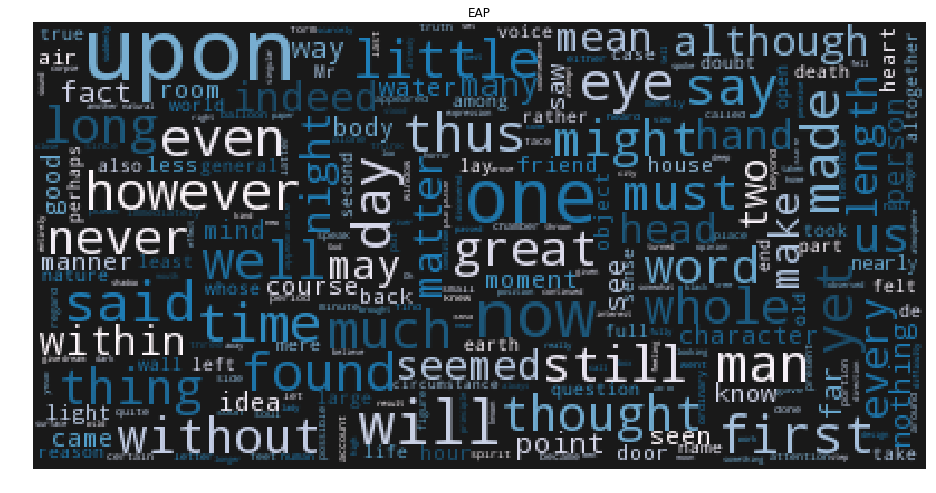

In [31]:
plt = plotWordCloud(train_df, TEXT_COL, CATEGORY_COL, "EAP")
plt.show()

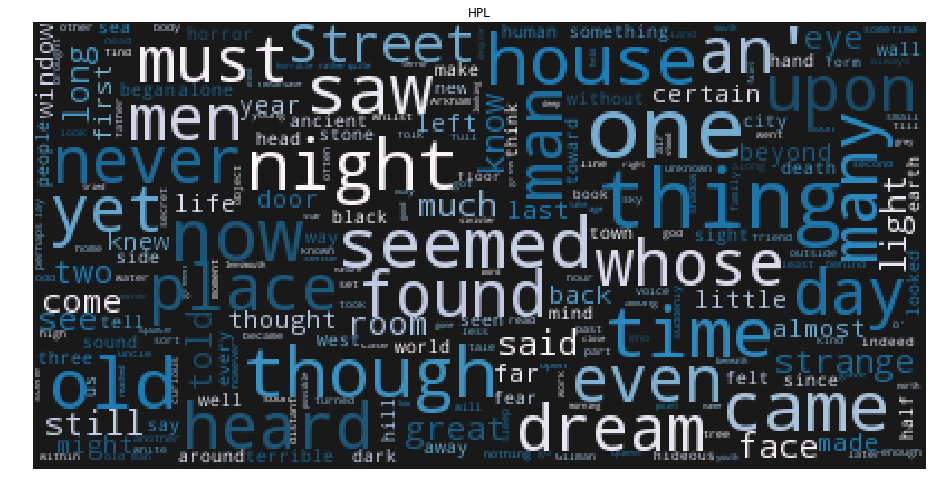

In [32]:
plt = plotWordCloud(train_df, TEXT_COL, CATEGORY_COL, "HPL")
plt.show()

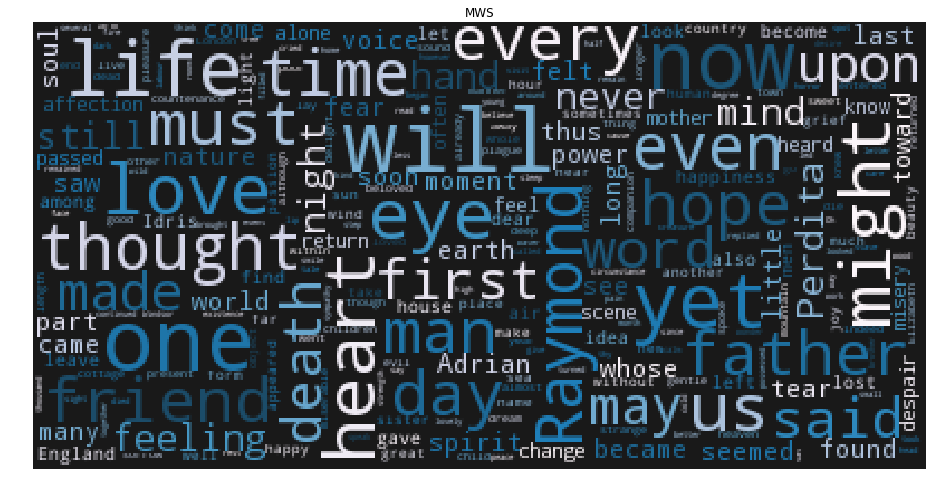

In [33]:
plt = plotWordCloud(train_df, TEXT_COL, CATEGORY_COL, "MWS")
plt.show()